In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('wordnet')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
import warnings

C:\Users\berge\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\berge\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\berge\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
"""
Helper function to concat all lines into one text
"""
def constract_text(df):
    text = ""
    for index,line in df.iterrows():
        text += line['cfp_text']
    
    return text

### Getting the data

#### Reading artificial_intelligence_cfp file

In [3]:
pd.set_option('display.max_colwidth',100)
artIn_rawdata = pd.read_csv("artificial_intelligence_cfp.csv")
artIn_rawdata = artIn_rawdata[['cfp_text']]
print("AI_rawdata shape: {}".format(artIn_rawdata.shape))
#artIn_rawdata.head()

AI_rawdata shape: (400, 1)


#### Reading computational_linguistics_cfp file

In [4]:
compLing_rawdata = pd.read_csv("computational_linguistics_cfp.csv")
compLing_rawdata = compLing_rawdata[['cfp_text']]
print("CompLin_rawdata shape: {}".format(compLing_rawdata.shape))
#compLin_rawdata.head()

CompLin_rawdata shape: (312, 1)


#### Reading healthcare_cfp file

In [5]:
healthcare_rawdata = pd.read_csv("healthcare_cfp.csv")
healthcare_rawdata = healthcare_rawdata[['cfp_text']]
print("healthcare_rawdata shape: {}".format(healthcare_rawdata.shape))
#healthcare_rawdata.head()

healthcare_rawdata shape: (324, 1)


#### Reading marketing_cfp file

In [6]:
marketing_rawdata = pd.read_csv("marketing_cfp.csv")
marketing_rawdata = marketing_rawdata[['cfp_text']]
print("marketing_rawdata shape: {}".format(marketing_rawdata.shape))
#marketing_rawdata.head()

marketing_rawdata shape: (123, 1)


#### Reading nlp_cfp file

In [7]:
nlp_rawdata = pd.read_csv("nlp_cfp.csv")
nlp_rawdata = nlp_rawdata[['cfp_text']]
print("nlp_rawdata shape: {}".format(nlp_rawdata.shape))
#nlp_rawdata.head()

nlp_rawdata shape: (400, 1)


#### Reading signal_processing_cfp file

In [8]:
sig_proc_rawdata = pd.read_csv("signal_processing_cfp.csv")
sig_proc_rawdata = sig_proc_rawdata[['cfp_text']]
print("sig_proc_rawdata shape: {}".format(sig_proc_rawdata.shape))
#sig_proc_rawdata.head()

sig_proc_rawdata shape: (400, 1)


### Concatinating all lines into one text for each topic

In [9]:
ai_text = constract_text(artIn_rawdata)

In [10]:
compLing_text = constract_text(compLing_rawdata)

In [11]:
healthcare_text = constract_text(healthcare_rawdata)

In [12]:
nlp_text = constract_text(nlp_rawdata)

In [13]:
sig_proc_text = constract_text(sig_proc_rawdata)

In [14]:
marketing_text = constract_text(marketing_rawdata)

In [15]:
documents = [ai_text, compLing_text, healthcare_text, nlp_text, sig_proc_text, marketing_text]

In [16]:
len(documents)

6

###  Punctuation/Tokenization/Stopwords/Stemming/Lemmatization

### Remove Punctuation

In [17]:
def remove_punct(text):
    text_nonpunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nonpunct

### Tokenization

In [18]:
def tokenize(text):
    tokens = re.findall('[A-Z]+[a-z]+', text)
    return tokens

### Remove stopwords

In [19]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if not word.lower() in stopwords]
    return text

### Stemming

In [20]:
def stamming(tokenize_text):
    text = [ps.stem(word) for word in tokenize_text]
    return text

### Lemmatizer

In [21]:
def lemmatizing(tokenize_text):
    text = [wn.lemmatize(word) for word in tokenize_text]
    return text

#### Function to run all function 

In [22]:
def clean_text_lam(text):
    text_clean = remove_punct(text)
    text_tokenized = tokenize(text_clean)
    text_nostop = remove_stopwords(text_tokenized)
    text_lemmatized = lemmatizing(text_nostop)
    return text_lemmatized

In [64]:
def clean_text_stem(text):
    text_clean = remove_punct(text)
    text_tokenized = tokenize(text_clean)
    text_nostop = remove_stopwords(text_tokenized)
    text_stemmed = stamming(text_nostop)
    print(len(text_stemmed))
    return text_stemmed

## Vectorization 

### TF-IDF

In [31]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text_stem)
spars_matrix_tfidf = tfidf_vect.fit_transform(documents)

In [32]:
doc_term_matrix = spars_matrix_tfidf.todense()
print(spars_matrix_tfidf.shape)

(6, 19358)


In [33]:
X_tfidf_df = pd.DataFrame(doc_term_matrix,
                          columns = tfidf_vect.get_feature_names(),
                          index=['ai_text','compLin_text','healthcare_text',
                                 'nlp_text','sig_proc_text','marketing_text'])

X_tfidf_df.head(6)

,aachen,aadil,aakash,aalasp,aalborg,aalesund,aalst,aalto,aarhu,aarn,...,zuva,zuzana,zvarova,zvonko,zweigenbaum,zwiggelaar,zxjf,zydney,zygmunt,zyrian
ai_text,0.000530,0.000000,0.000517,0.000000,0.000307,0.000000,0.000000,0.000229,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
compLin_text,0.000749,0.000731,0.000000,0.000000,0.000000,0.000000,0.000000,0.001297,0.001012,0.002923,...,0.000000,0.000731,0.000000,0.000000,0.014381,0.000000,0.000000,0.000000,0.002192,0.002996
healthcare_text,0.002516,0.000000,0.000000,0.000982,0.001165,0.000982,0.000000,0.000436,0.000000,0.000000,...,0.000000,0.000000,0.000982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nlp_text,0.000905,0.000000,0.000000,0.000000,0.000349,0.000000,0.001178,0.001045,0.000408,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000966,0.000589,0.001178,0.000589,0.000000,0.001448
sig_proc_text,0.000546,0.000000,0.000000,0.000000,0.000316,0.000000,0.000000,0.000236,0.000369,0.000000,...,0.000533,0.000000,0.000000,0.000533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
marketing_text,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003541,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
X_tfidf_df.T.sort_values(by=['ai_text'],ascending=False).head(10)

,ai_text,compLin_text,healthcare_text,nlp_text,sig_proc_text,marketing_text
confer,0.339850,0.133316,0.146502,0.200976,0.306455,0.205382
univers,0.334572,0.723021,0.442557,0.561113,0.305036,0.257318
comput,0.308183,0.173538,0.128189,0.256382,0.221802,0.033050
intern,0.307035,0.061955,0.095924,0.171966,0.223457,0.154627
system,0.230391,0.034059,0.149118,0.112641,0.205013,0.076723
intellig,0.215246,0.031464,0.074559,0.085722,0.076850,0.022427
submiss,0.190004,0.170619,0.146938,0.206464,0.152045,0.101511
technolog,0.175777,0.101528,0.182255,0.163603,0.184914,0.099150
scienc,0.151682,0.100555,0.116416,0.129890,0.100969,0.072002
data,0.151452,0.040871,0.115544,0.119174,0.090565,0.072002


For each topics the most frequent words can be shown as above.
This can be done for each paper

## Cosine Similarity 

In [34]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = ['ai_text','compLin_text','healthcare_text',
                'nlp_text','sig_proc_text','marketing_text']
  df.index = ['ai_text','compLin_text','healthcare_text',
              'nlp_text','sig_proc_text','marketing_text']
  fig, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(df, cmap=cmap)

In [35]:
similarity_tfidf = cosine_similarity(X_tfidf_df,X_tfidf_df)

#### TF-IDF

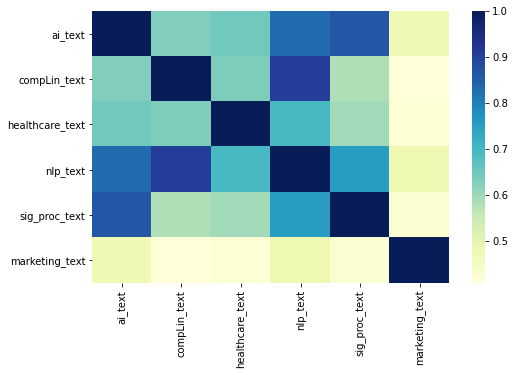

In [38]:
create_heatmap(similarity_tfidf)